In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import skew


In [44]:
file_path = "/content/drive/MyDrive/Warehouse_and_Retail_Sales.csv"
df = pd.read_csv(file_path)
print("Shape:", df.shape)
df.head()


Shape: (307645, 9)


,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [45]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


In [47]:
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]


,0
SUPPLIER,167
RETAIL SALES,3
ITEM TYPE,1


In [48]:
#For SUPPLIER (categorical) – impute with 'Unknown'
df['SUPPLIER'].fillna('Unknown', inplace=True)

# For RETAIL SALES (numerical) – impute with median
df['RETAIL SALES'].fillna(df['RETAIL SALES'].median(), inplace=True)

# For ITEM TYPE (categorical) – impute with mode
df['ITEM TYPE'].fillna(df['ITEM TYPE'].mode()[0], inplace=True)

# Recheck to confirm
df.isnull().sum()


/tmp/ipython-input-48-163855001.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SUPPLIER'].fillna('Unknown', inplace=True)
/tmp/ipython-input-48-163855001.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,0
YEAR,0
MONTH,0
SUPPLIER,0
ITEM CODE,0
ITEM DESCRIPTION,0
ITEM TYPE,0
RETAIL SALES,0
RETAIL TRANSFERS,0
WAREHOUSE SALES,0


In [49]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
YEAR,307645.0,NaN,NaN,NaN,2018.438525,1.083061,2017.0,2017.0,2019.0,2019.0,2020.0
MONTH,307645.0,NaN,NaN,NaN,6.423862,3.461812,1.0,3.0,7.0,9.0,12.0
SUPPLIER,307645,397,REPUBLIC NATIONAL DISTRIBUTING CO,20995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ITEM CODE,307645,34056,100749,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ITEM DESCRIPTION,307645,34822,BURGANS ALBARINO - 750ML,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ITEM TYPE,307645,8,WINE,187641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RETAIL SALES,307645.0,NaN,NaN,NaN,7.024006,30.986094,-6.49,0.0,0.32,3.26,2739.0
RETAIL TRANSFERS,307645.0,NaN,NaN,NaN,6.936465,30.237195,-38.49,0.0,0.0,3.0,1990.83
WAREHOUSE SALES,307645.0,NaN,NaN,NaN,25.294597,249.916798,-7800.0,0.0,1.0,5.0,18317.0


In [50]:
df.nunique().sort_values(ascending=False)


,0
ITEM DESCRIPTION,34822
ITEM CODE,34056
RETAIL SALES,10674
WAREHOUSE SALES,4895
RETAIL TRANSFERS,2504
SUPPLIER,397
MONTH,12
ITEM TYPE,8
YEAR,4


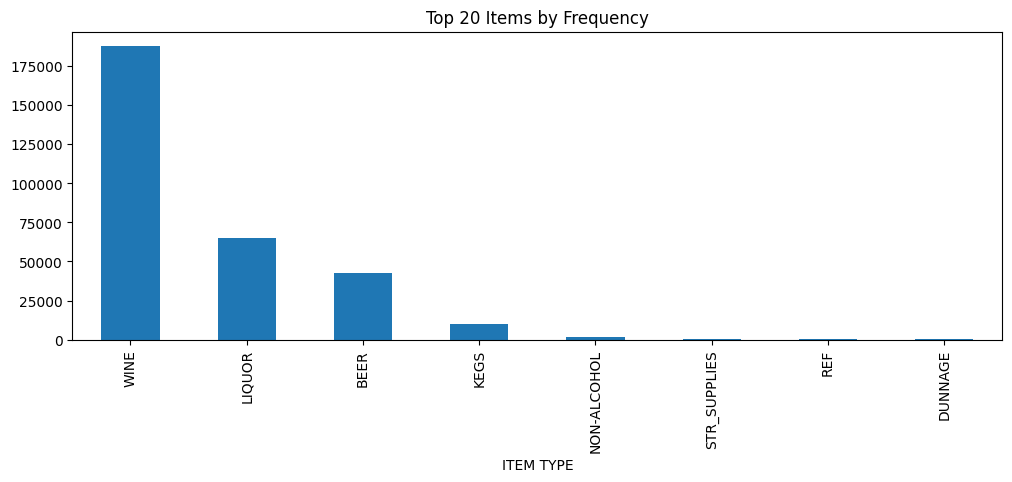

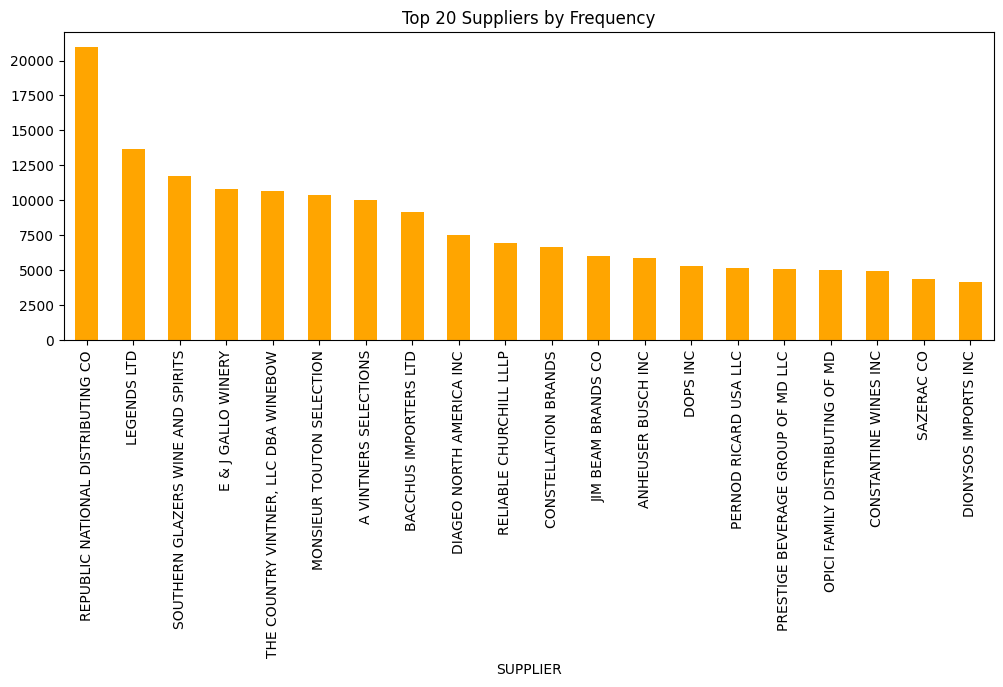

In [51]:
plt.figure(figsize=(12, 4))
df['ITEM TYPE'].value_counts().head(20).plot(kind='bar')
plt.title("Top 20 Items by Frequency")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 4))
df['SUPPLIER'].value_counts().head(20).plot(kind='bar', color='orange')
plt.title("Top 20 Suppliers by Frequency")
plt.xticks(rotation=90)
plt.show()

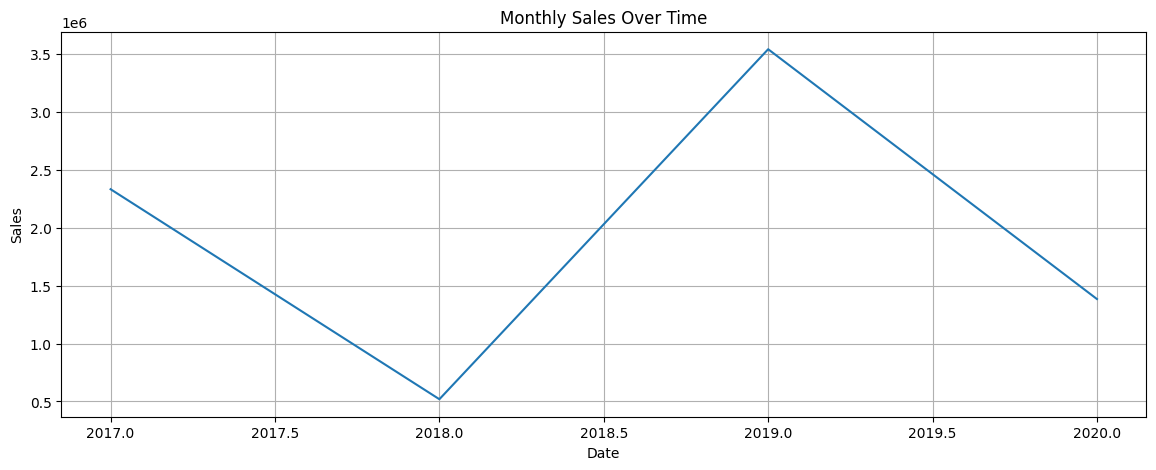

In [52]:
monthly_sales = df.groupby('YEAR')['WAREHOUSE SALES'].sum()
monthly_sales.plot(figsize=(14, 5), title="Monthly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid()
plt.show()

In [53]:
# Check skewness to decide if transformation is needed
skew_values = df.select_dtypes(include=['float64', 'int64']).skew().sort_values(ascending=False)
print("Skewness:\n", skew_values)

Skewness:
 WAREHOUSE SALES     28.807663
RETAIL SALES        19.421882
RETAIL TRANSFERS    17.384265
MONTH               -0.180377
YEAR                -0.225462
dtype: float64


In [58]:
# Replace negative values with NaN before applying log1p
for col in ['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']:
    df.loc[df[col] < 0, col] = np.nan  # force invalid log targets to NaN
    df[col + '_LOG'] = np.log1p(df[col])


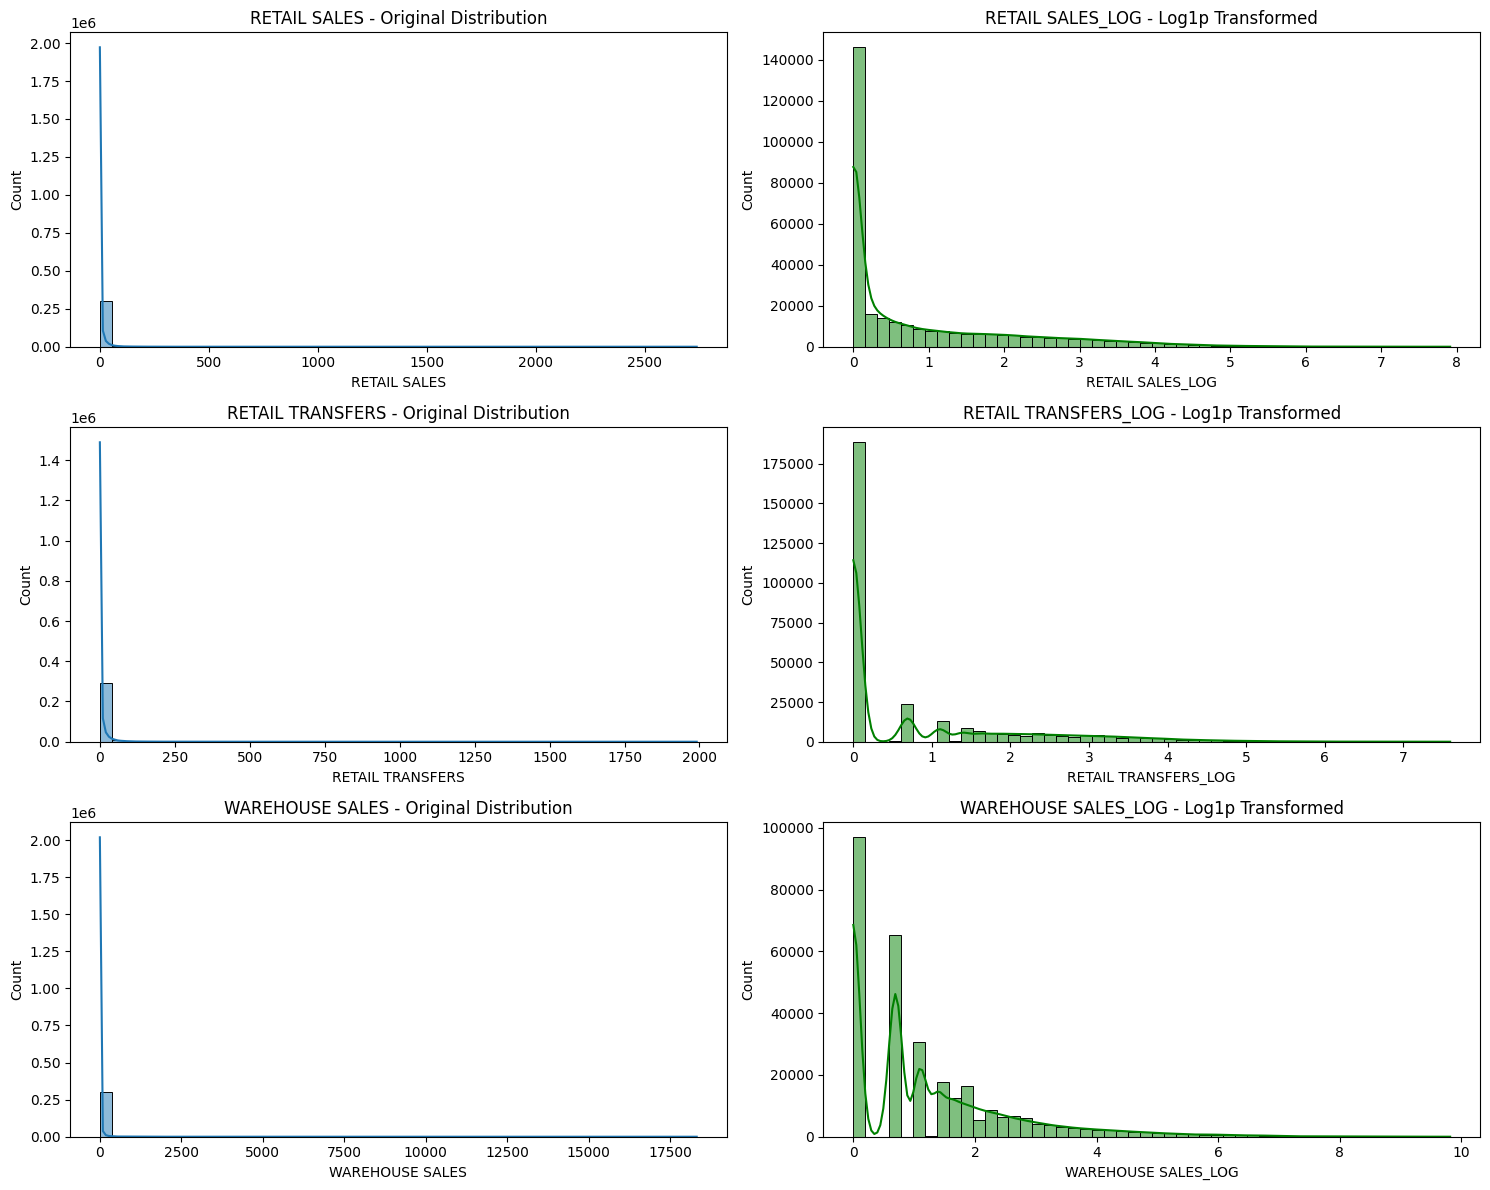

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']
log_cols = ['RETAIL SALES_LOG', 'RETAIL TRANSFERS_LOG', 'WAREHOUSE SALES_LOG']

fig, axes = plt.subplots(3, 2, figsize=(15, 12))

for i, (orig, logg) in enumerate(zip(cols, log_cols)):
    sns.histplot(df[orig], bins=50, kde=True, ax=axes[i][0])
    axes[i][0].set_title(f'{orig} - Original Distribution')

    sns.histplot(df[logg], bins=50, kde=True, ax=axes[i][1], color='green')
    axes[i][1].set_title(f'{logg} - Log1p Transformed')

plt.tight_layout()
plt.show()


In [60]:
# Step 1: Check how many outliers exist in each log-transformed column using IQR
for col in ['RETAIL_SALES_LOG', 'RETAIL_TRANSFERS_LOG', 'WAREHOUSE_SALES_LOG']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers ({(len(outliers)/len(df))*100:.2f}%)")


RETAIL_SALES_LOG: 13341 outliers (4.34%)
RETAIL_TRANSFERS_LOG: 16866 outliers (5.48%)
WAREHOUSE_SALES_LOG: 11927 outliers (3.88%)


In [61]:
# Remove IQR-based outliers across all log-transformed columns
for col in ['RETAIL_SALES_LOG', 'RETAIL_TRANSFERS_LOG', 'WAREHOUSE_SALES_LOG']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Confirm shape after cleaning
print("Final shape after outlier removal:", df.shape)


Final shape after outlier removal: (265689, 15)


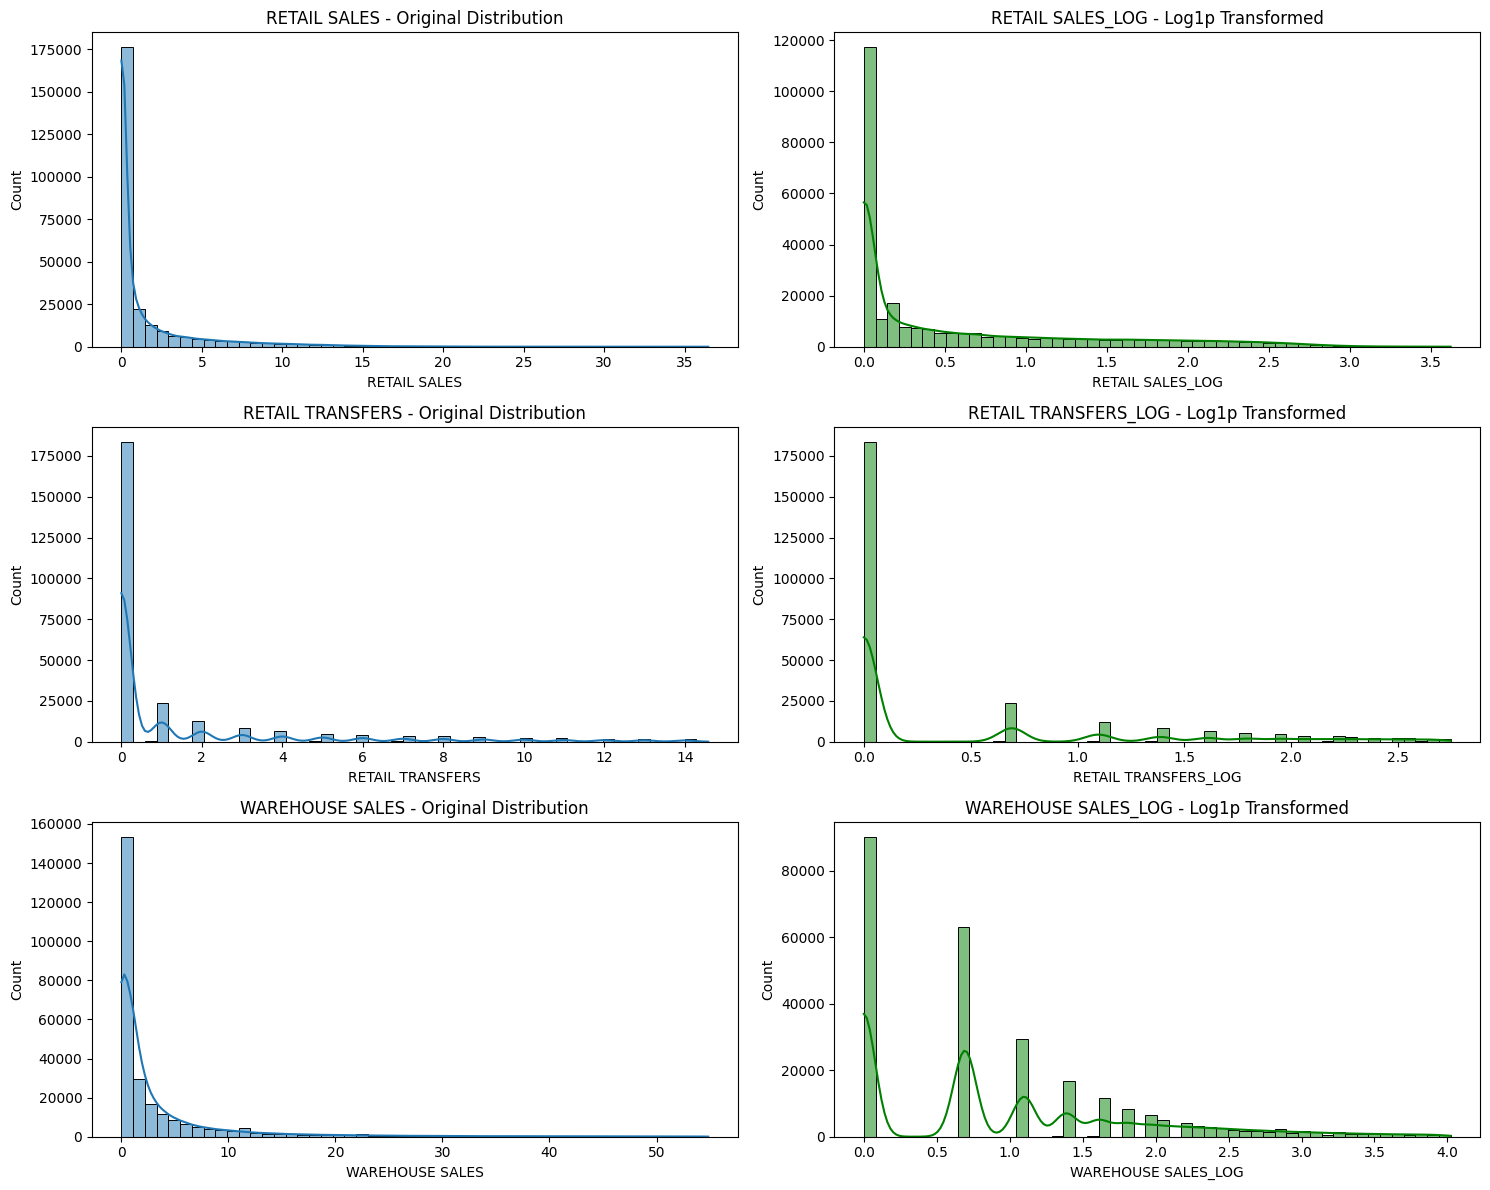

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']
log_cols = ['RETAIL SALES_LOG', 'RETAIL TRANSFERS_LOG', 'WAREHOUSE SALES_LOG']

fig, axes = plt.subplots(3, 2, figsize=(15, 12))

for i, (orig, logg) in enumerate(zip(cols, log_cols)):
    sns.histplot(df[orig], bins=50, kde=True, ax=axes[i][0])
    axes[i][0].set_title(f'{orig} - Original Distribution')

    sns.histplot(df[logg], bins=50, kde=True, ax=axes[i][1], color='green')
    axes[i][1].set_title(f'{logg} - Log1p Transformed')

plt.tight_layout()
plt.show()


In [64]:
print(df.columns.tolist())
df.drop(columns=['RETAIL SALES_LOG', 'WAREHOUSE SALES_LOG', 'RETAIL TRANSFERS_LOG'], inplace=True)


['YEAR', 'MONTH', 'SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION', 'ITEM TYPE', 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES', 'RETAIL_SALES_LOG', 'WAREHOUSE_SALES_LOG', 'RETAIL_TRANSFERS_LOG', 'RETAIL SALES_LOG', 'RETAIL TRANSFERS_LOG', 'WAREHOUSE SALES_LOG']


In [65]:
print(df.columns.tolist())

['YEAR', 'MONTH', 'SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION', 'ITEM TYPE', 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES', 'RETAIL_SALES_LOG', 'WAREHOUSE_SALES_LOG', 'RETAIL_TRANSFERS_LOG']


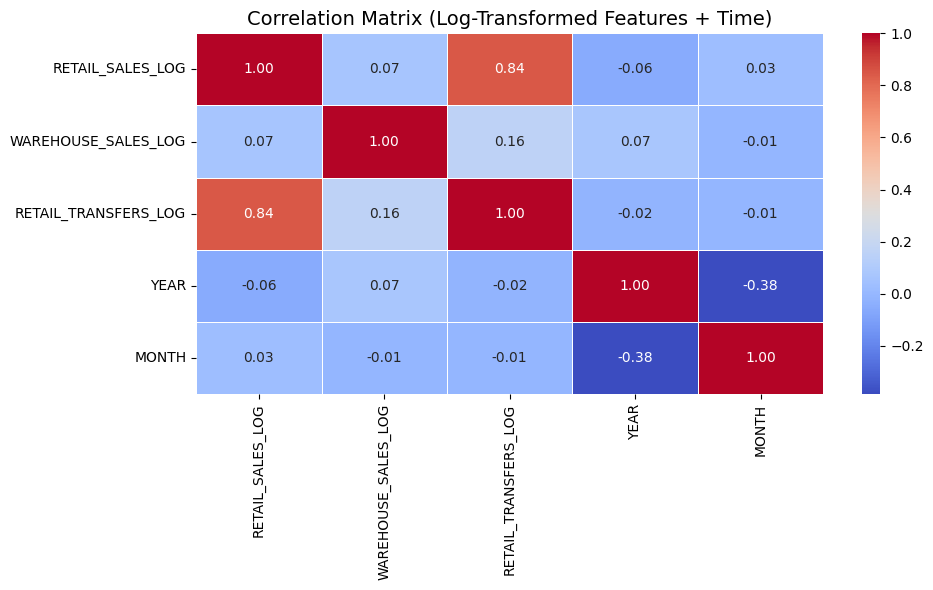

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

log_columns = ['RETAIL_SALES_LOG', 'WAREHOUSE_SALES_LOG', 'RETAIL_TRANSFERS_LOG', 'YEAR', 'MONTH']
log_corr_df = df[log_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(log_corr_df, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix (Log-Transformed Features + Time)", fontsize=14)
plt.tight_layout()
plt.show()


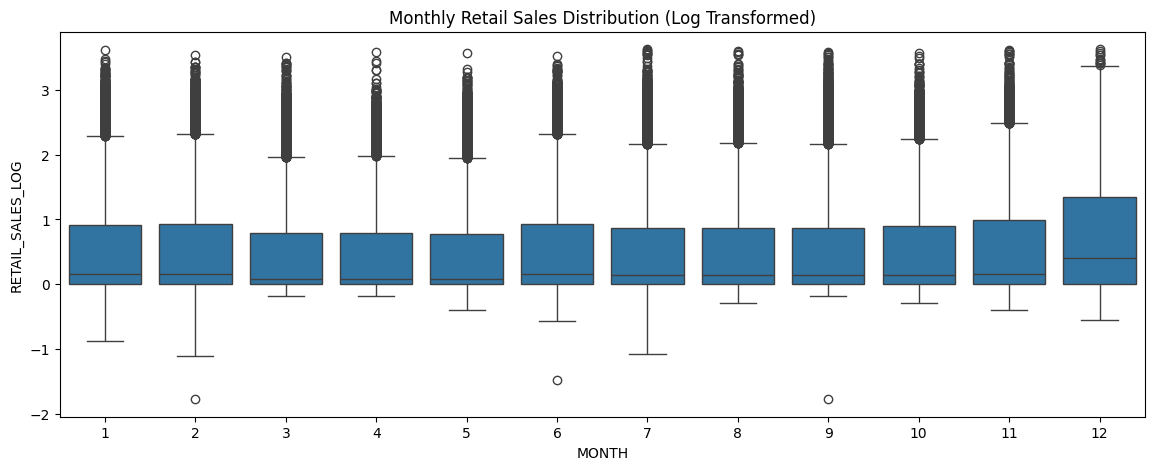

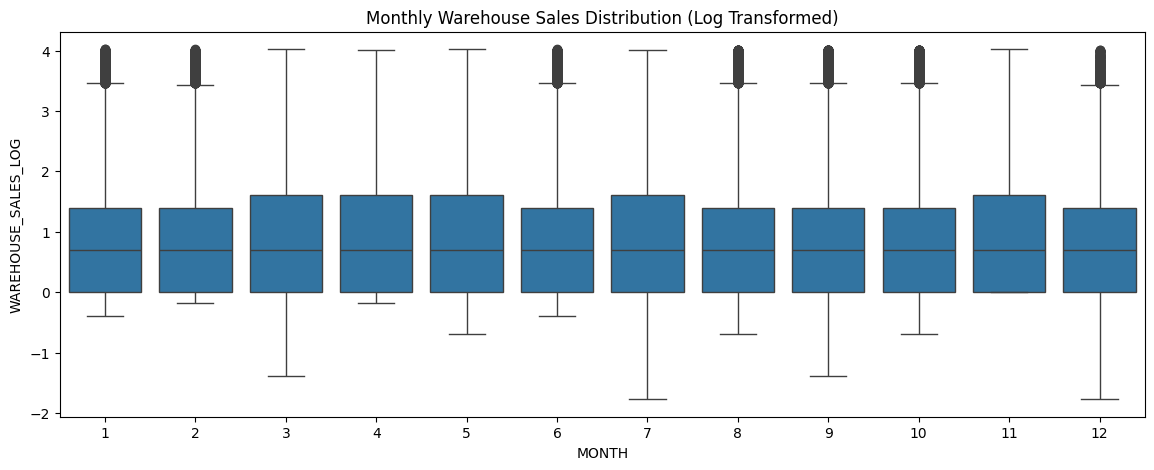

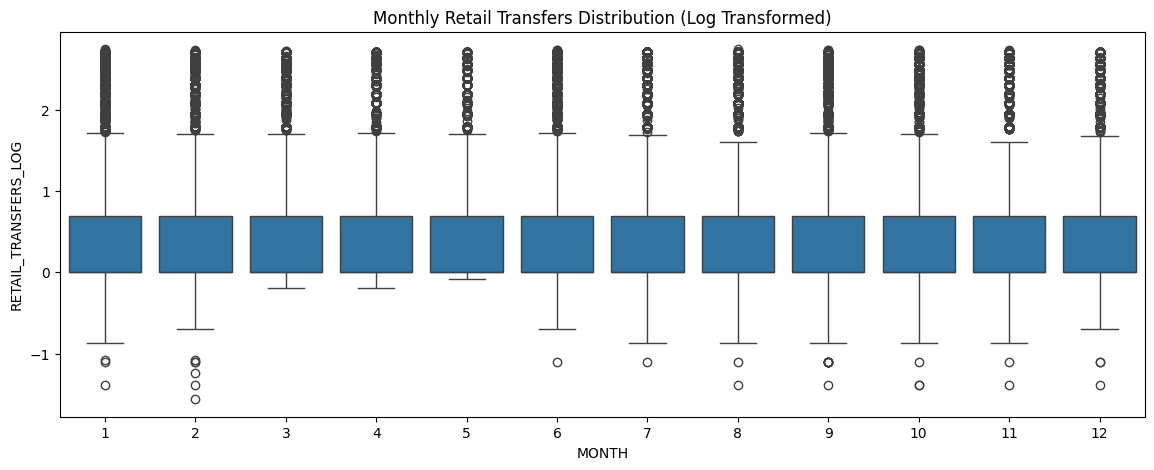

In [67]:
plt.figure(figsize=(14, 5))
sns.boxplot(x='MONTH', y='RETAIL_SALES_LOG', data=df)
plt.title('Monthly Retail Sales Distribution (Log Transformed)')
plt.show()
plt.figure(figsize=(14, 5))
sns.boxplot(x='MONTH', y='WAREHOUSE_SALES_LOG', data=df)
plt.title('Monthly Warehouse Sales Distribution (Log Transformed)')
plt.show()
plt.figure(figsize=(14, 5))
sns.boxplot(x='MONTH', y='RETAIL_TRANSFERS_LOG', data=df)
plt.title('Monthly Retail Transfers Distribution (Log Transformed)')
plt.show()


In [68]:
df.groupby('MONTH')[['RETAIL_SALES_LOG', 'WAREHOUSE_SALES_LOG', 'RETAIL_TRANSFERS_LOG']].describe()


RETAIL_SALES_LOG                                                         \
                 count      mean       std       min  25%       50%       75%   
MONTH                                                                           
1              33081.0  0.552785  0.756840 -0.867501  0.0  0.157004  0.916291   
2              22198.0  0.562263  0.759402 -1.771957  0.0  0.157004  0.924259   
3              20427.0  0.502453  0.736624 -0.186330  0.0  0.076961  0.783902   
4              11026.0  0.501174  0.723601 -0.186330  0.0  0.076961  0.792993   
5              11187.0  0.492261  0.730988 -0.400478  0.0  0.076961  0.779325   
6              22507.0  0.562984  0.775690 -1.469676  0.0  0.157004  0.924259   
7              31306.0  0.534988  0.757218 -1.078810  0.0  0.148420  0.867100   
8              22497.0  0.541407  0.756363 -0.287682  0.0  0.148420  0.871293   
9              32239.0  0.539563  0.766952 -1.771957  0.0  0.148420  0.867100   
10             23065.0  0.540036  0.754445 -0.287682  0.0  0.148420  0.896088   
11             23591.0  0.585711  0.787820 -0.400478  0.0  0.157004  0.993252   
12             12565.0  0.746937  0.858565 -0.544727  0.0  0.398776  1.345472   

                WAREHOUSE_SALES_LOG            ...                      \
            max               count      mean  ...       75%       max   
MONTH                                          ...                       
1      3.608753             33081.0  0.953014  ...  1.386294  4.022311   
2      3.536602             22198.0  0.914822  ...  1.386294  4.020877   
3      3.497416             20427.0  0.992536  ...  1.609438  4.022311   
4      3.574030             11026.0  1.001719  ...  1.609438  4.007333   
5      3.559055             11187.0  1.041803  ...  1.609438  4.020877   
6      3.523120             22507.0  0.942796  ...  1.386294  4.020877   
7      3.620868             31306.0  0.960913  ...  1.609438  4.016383   
8      3.599502             22497.0  0.942145  ...  1.386294  4.007333   
9      3.585739             32239.0  0.959930  ...  1.386294  4.016383   
10     3.562466             23065.0  0.955263  ...  1.386294  4.007333   
11     3.610918             23591.0  0.956597  ...  1.609438  4.020877   
12     3.623541             12565.0  0.828085  ...  1.386294  4.007333   

      RETAIL_TRANSFERS_LOG                                                    \
                     count      mean       std       min  25%  50%       75%   
MONTH                                                                          
1                  33081.0  0.476929  0.773849 -1.386294  0.0  0.0  0.693147   
2                  22198.0  0.447972  0.765068 -1.560648  0.0  0.0  0.693147   
3                  20427.0  0.431997  0.751620 -0.186330  0.0  0.0  0.693147   
4                  11026.0  0.433983  0.751378 -0.186330  0.0  0.0  0.693147   
5                  11187.0  0.408224  0.728346 -0.083382  0.0  0.0  0.693147   
6                  22507.0  0.446381  0.763138 -1.108663  0.0  0.0  0.693147   
7                  31306.0  0.448460  0.764268 -1.108663  0.0  0.0  0.693147   
8                  22497.0  0.449694  0.761525 -1.386294  0.0  0.0  0.693147   
9                  32239.0  0.441271  0.763996 -1.386294  0.0  0.0  0.693147   
10                 23065.0  0.458475  0.779629 -1.386294  0.0  0.0  0.693147   
11                 23591.0  0.431225  0.763815 -1.386294  0.0  0.0  0.693147   
12                 12565.0  0.420784  0.759533 -1.386294  0.0  0.0  0.693147   

                 
            max  
MONTH            
1      2.745988  
2      2.740195  
3      2.729812  
4      2.708050  
5      2.708050  
6      2.741485  
7      2.708050  
8      2.745988  
9      2.740840  
10     2.740840  
11     2.735665  
12     2.708050  

[12 rows x 24 columns]

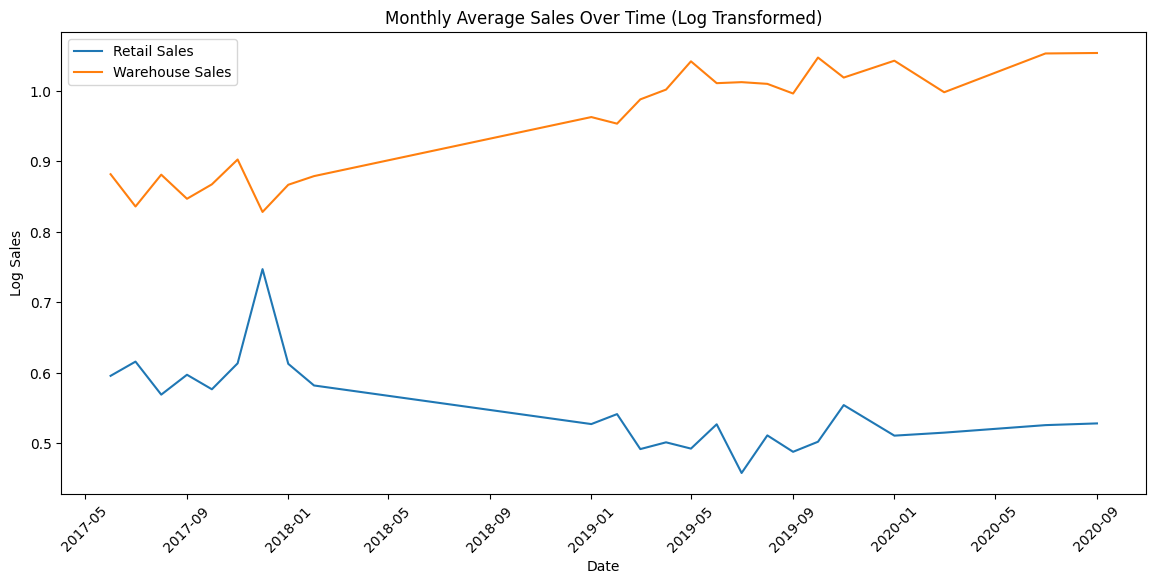

In [69]:
monthly_avg = df.groupby(['YEAR', 'MONTH'])[['RETAIL_SALES_LOG', 'WAREHOUSE_SALES_LOG']].mean().reset_index()
monthly_avg['DATE'] = pd.to_datetime(monthly_avg['YEAR'].astype(str) + '-' + monthly_avg['MONTH'].astype(str))

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_avg, x='DATE', y='RETAIL_SALES_LOG', label='Retail Sales')
sns.lineplot(data=monthly_avg, x='DATE', y='WAREHOUSE_SALES_LOG', label='Warehouse Sales')
plt.title('Monthly Average Sales Over Time (Log Transformed)')
plt.ylabel('Log Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend()
plt.show()


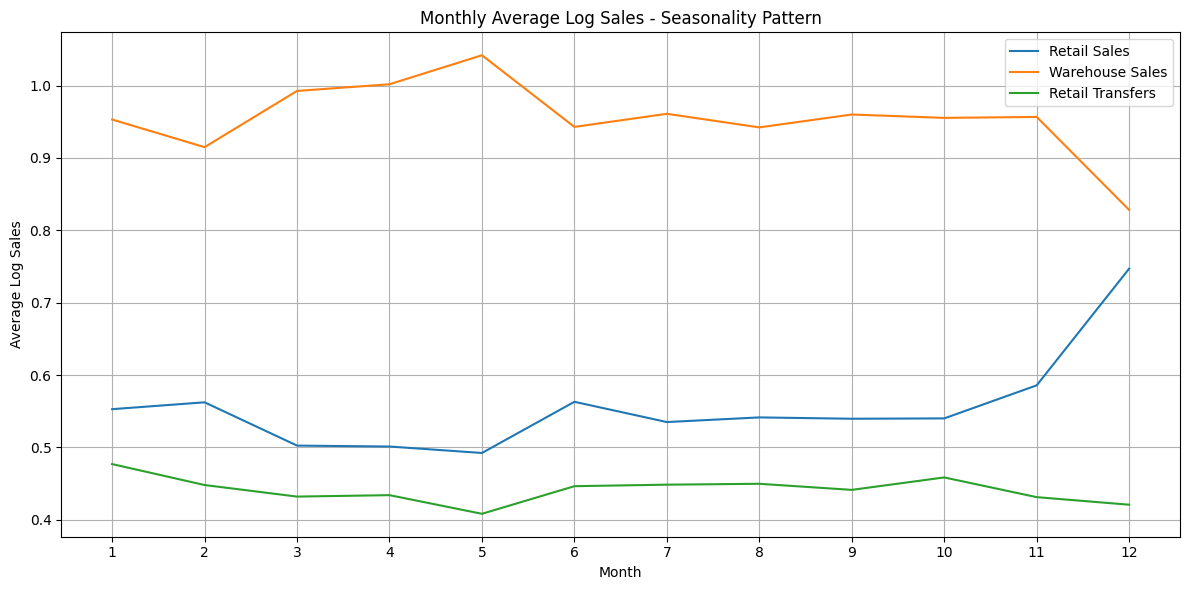

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Monthly average sales (log-transformed)
monthly_avg = df.groupby('MONTH')[['RETAIL_SALES_LOG', 'WAREHOUSE_SALES_LOG', 'RETAIL_TRANSFERS_LOG']].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg, x='MONTH', y='RETAIL_SALES_LOG', label='Retail Sales')
sns.lineplot(data=monthly_avg, x='MONTH', y='WAREHOUSE_SALES_LOG', label='Warehouse Sales')
sns.lineplot(data=monthly_avg, x='MONTH', y='RETAIL_TRANSFERS_LOG', label='Retail Transfers')
plt.title('Monthly Average Log Sales - Seasonality Pattern')
plt.xlabel('Month')
plt.ylabel('Average Log Sales')
plt.xticks(ticks=range(1, 13))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [71]:
# Drop the original skewed columns since we've already used their log1p versions
df = df.drop(['RETAIL SALES', 'WAREHOUSE SALES', 'RETAIL TRANSFERS'], axis=1)


In [72]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION', 'ITEM TYPE']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoder for later inverse transform


In [73]:
df

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL_SALES_LOG,WAREHOUSE_SALES_LOG,RETAIL_TRANSFERS_LOG
0,2020,1,272,3,4387,6,0.000000,1.098612,0.000000
1,2020,1,263,8,21707,6,0.000000,1.609438,0.693147
2,2020,1,270,11,26659,0,0.000000,0.693147,0.000000
3,2020,1,186,13,27375,6,0.000000,0.693147,0.000000
4,2020,1,91,20,27160,6,0.598837,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
307635,2020,9,272,33178,24023,0,0.223144,1.791759,1.098612
307638,2020,9,191,33183,12170,0,0.000000,1.609438,0.000000
307640,2020,9,191,33186,11635,0,0.000000,1.791759,0.000000
307642,2020,9,73,33190,11091,0,1.178655,0.000000,0.000000


In [75]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols = ['RETAIL_SALES_LOG', 'WAREHOUSE_SALES_LOG', 'RETAIL_TRANSFERS_LOG']
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [76]:
df

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL_SALES_LOG,WAREHOUSE_SALES_LOG,RETAIL_TRANSFERS_LOG
0,2020,1,272,3,4387,6,0.328414,0.495415,0.362382
1,2020,1,263,8,21707,6,0.328414,0.583576,0.523331
2,2020,1,270,11,26659,0,0.328414,0.425438,0.362382
3,2020,1,186,13,27375,6,0.328414,0.425438,0.362382
4,2020,1,91,20,27160,6,0.439402,0.305812,0.362382
...,...,...,...,...,...,...,...,...,...
307635,2020,9,272,33178,24023,0,0.369771,0.615042,0.617480
307638,2020,9,191,33183,12170,0,0.328414,0.583576,0.362382
307640,2020,9,191,33186,11635,0,0.328414,0.615042,0.362382
307642,2020,9,73,33190,11091,0,0.546866,0.305812,0.362382


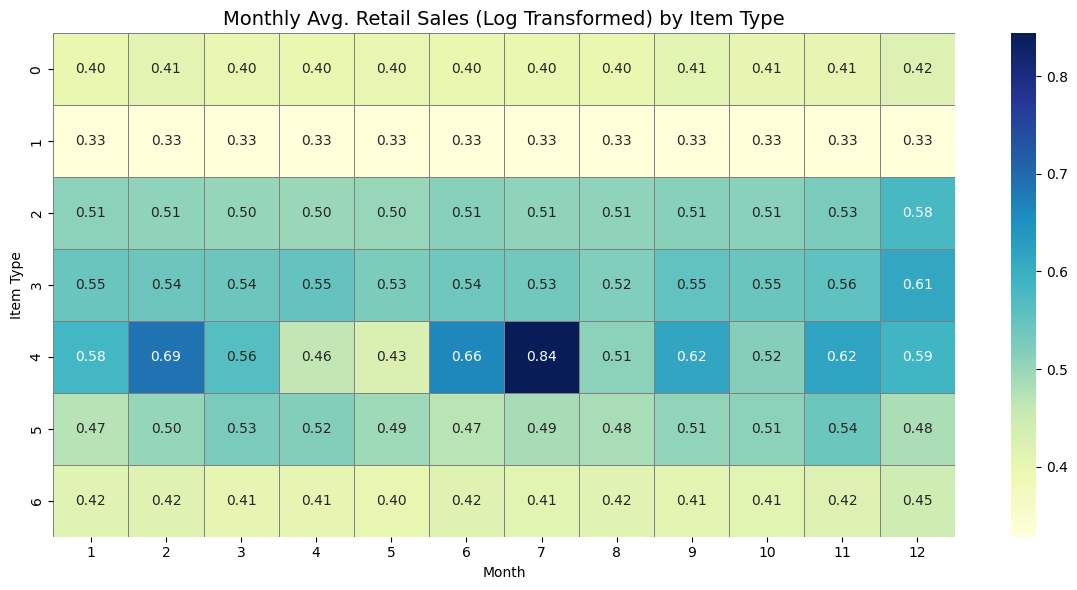

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Group by item type and month, take average of log-transformed retail sales
heatmap_data = df.groupby(['ITEM TYPE', 'MONTH'])['RETAIL_SALES_LOG'].mean().reset_index()

# Pivot the data for heatmap: rows = item type, columns = month
heatmap_pivot = heatmap_data.pivot(index='ITEM TYPE', columns='MONTH', values='RETAIL_SALES_LOG')

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_pivot, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5, linecolor='gray')
plt.title('Monthly Avg. Retail Sales (Log Transformed) by Item Type', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Item Type')
plt.tight_layout()
plt.show()


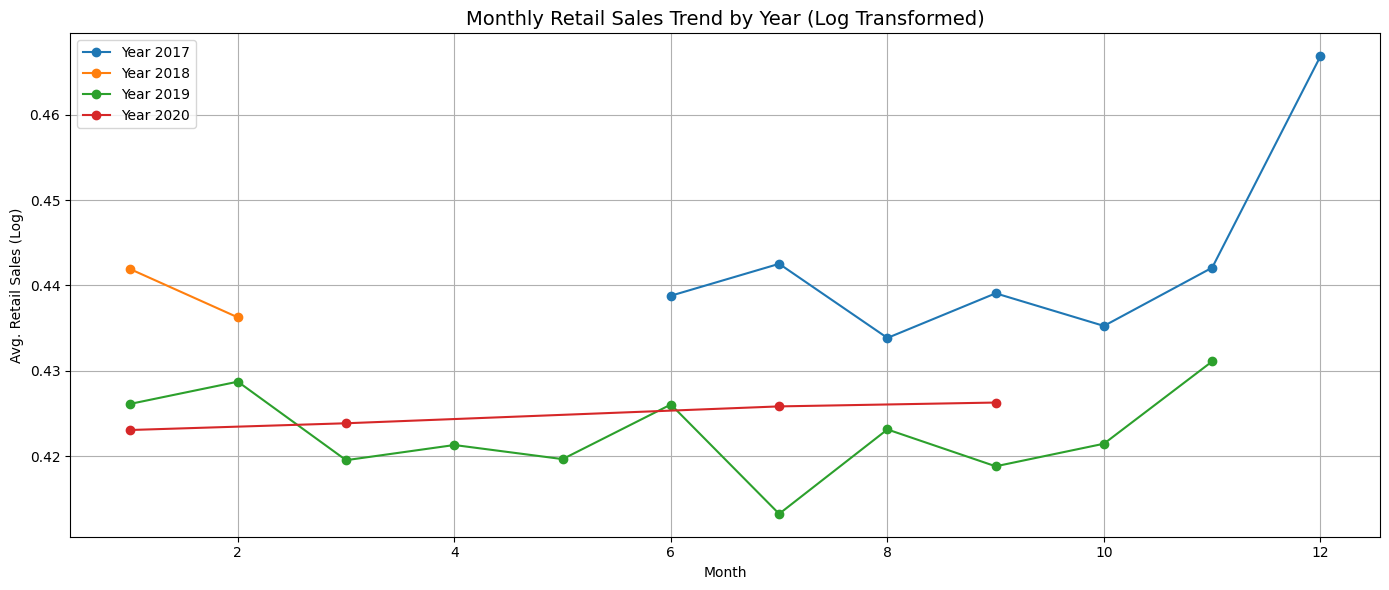

In [79]:
plt.figure(figsize=(14, 6))

# Group by year and month, take average of retail sales (log)
trend_data = df.groupby(['YEAR', 'MONTH'])['RETAIL_SALES_LOG'].mean().reset_index()

# Pivot so each year's monthly trend is a line
for year in sorted(df['YEAR'].unique()):
    monthly_avg = trend_data[trend_data['YEAR'] == year]
    plt.plot(monthly_avg['MONTH'], monthly_avg['RETAIL_SALES_LOG'], marker='o', label=f'Year {year}')

plt.title('Monthly Retail Sales Trend by Year (Log Transformed)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Avg. Retail Sales (Log)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


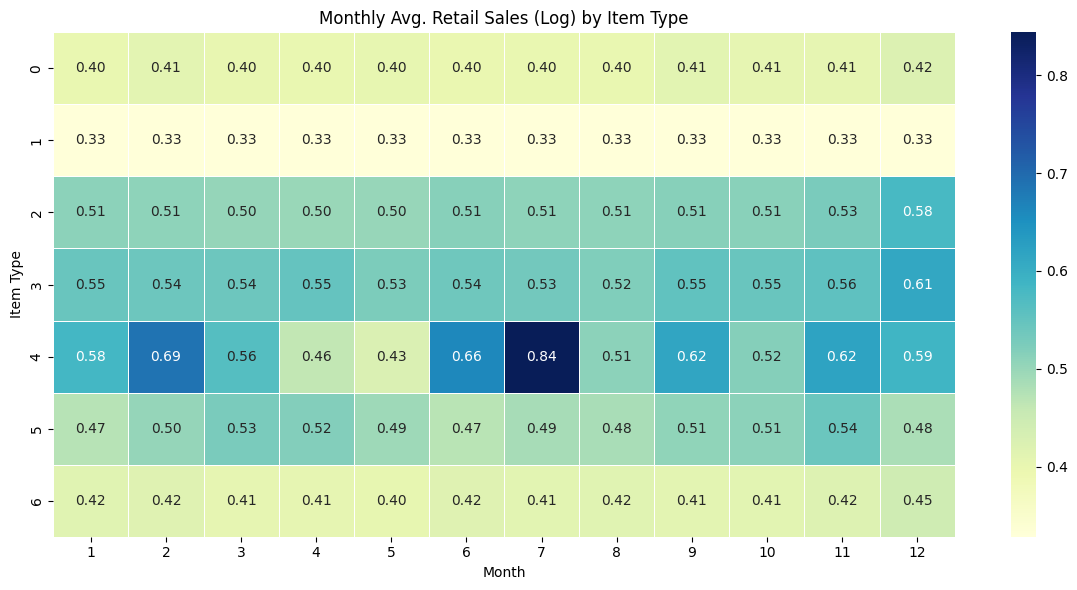

In [80]:
plt.figure(figsize=(12, 6))

# Group by item type and month
heatmap_data = df.groupby(['ITEM TYPE', 'MONTH'])['RETAIL_SALES_LOG'].mean().unstack()

# Create heatmap
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)

plt.title('Monthly Avg. Retail Sales (Log) by Item Type')
plt.xlabel('Month')
plt.ylabel('Item Type')
plt.tight_layout()
plt.show()


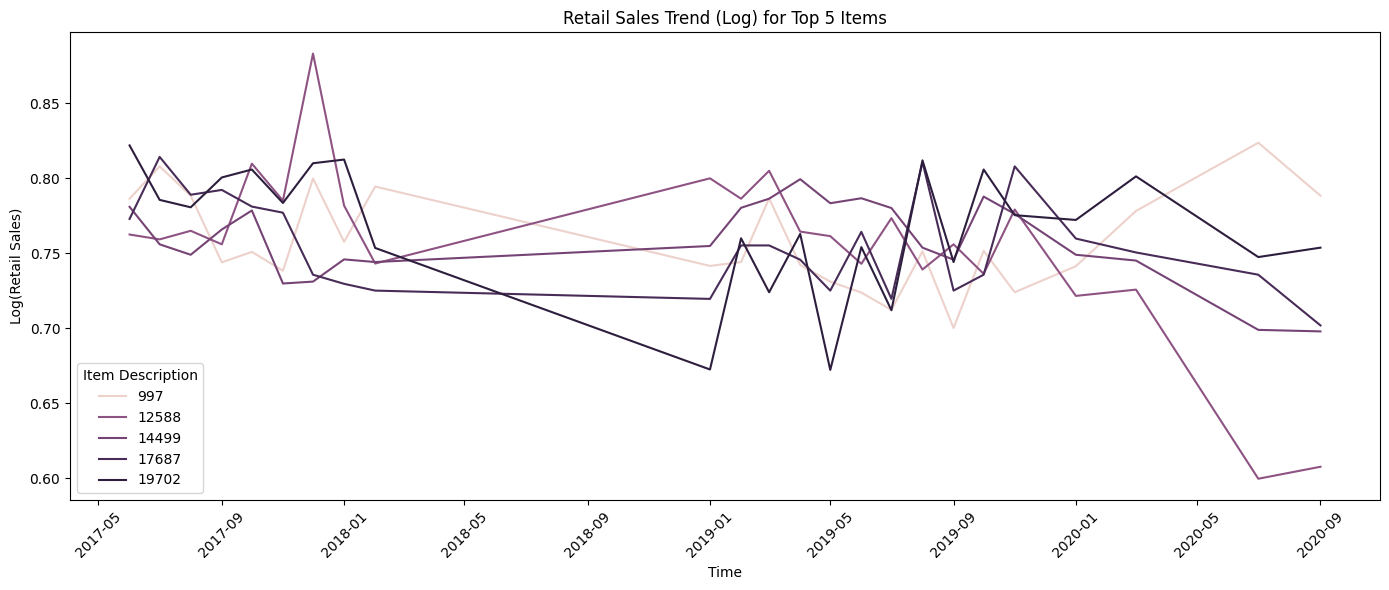

In [81]:
# Identify top 5 items by total retail sales
top_items = df.groupby('ITEM DESCRIPTION')['RETAIL_SALES_LOG'].sum().nlargest(5).index

# Filter for those items
top_df = df[df['ITEM DESCRIPTION'].isin(top_items)]

# Create a combined "Year-Month" column for proper time series plotting
top_df['YEAR_MONTH'] = pd.to_datetime(top_df['YEAR'].astype(str) + '-' + top_df['MONTH'].astype(str))

# Plot line chart
plt.figure(figsize=(14, 6))
sns.lineplot(data=top_df, x='YEAR_MONTH', y='RETAIL_SALES_LOG', hue='ITEM DESCRIPTION')
plt.title('Retail Sales Trend (Log) for Top 5 Items')
plt.xlabel('Time')
plt.ylabel('Log(Retail Sales)')
plt.xticks(rotation=45)
plt.legend(title='Item Description')
plt.tight_layout()
plt.show()


In [77]:
save_path = '/content/drive/MyDrive/retail_cleaned.csv'

df.to_csv(save_path, index=False)
print(f"Data saved to: {save_path}")

Data saved to: /content/drive/MyDrive/retail_cleaned.csv
